In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os
import re
from xgboost import XGBClassifier
% matplotlib inline

In [2]:
os.chdir(r"C:\Users\Mohiuddin\Desktop\machine learning\ML\ml-hackerearth")

In [3]:
train_data = pd.read_csv('train_foreclosure.csv',encoding="utf-8")

In [4]:
test_data = pd.read_csv('test_foreclosure.csv')

In [5]:
Customers = pd.read_excel('Customers_31JAN2019.xlsx',encoding='latin-1')

In [6]:
LMS = pd.read_excel('LMS_31JAN2019.xlsx',encoding='latin-1')

In [7]:
RF = pd.read_excel('RF_Final_Data.xlsx',encoding='latin-1')

In [27]:
RF.head()

,TicketId,Type,SubType,Status,Date,Preprocessed_EmailBody,Preprocessed_Subject,Masked_CustomerID,Masked_AgreementID
0,571910,REQUEST,PROVISIONAL IT CERTIFICATE,Close,2019-01-23 16:34:00,"hi team, can you please provide me itcertifica...",loan account number - loannumber,12020736,0
1,572747,REQUEST,SOA,Close,2019-01-24 16:05:00,hi team can you please arrange the certificate...,certificate of interest and principal for home...,12019080,0
2,4622,General,Others,Close,2016-02-12 13:40:00,NaN,re: repaysch : loan number loannumber,12004815,0
3,4674,REQUEST,SOA,Close,2016-02-12 15:41:00,"dear sir, you for your promptreply, please not...",re: finalit : loan number loannumber,12005158,11230237
4,4681,QUERY,CHANGEOFROI,Close,2016-02-12 15:55:00,"dear sachin, for your mail. this seems a great...",re: fw: repaysch : loan number loannumber,12001022,0


In [25]:
Customers.head()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,12001000,1,5,NaN,33.0,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
1,12001001,1,5,NaN,44.0,M,M,POSTGRAD,0.0,NaN,NaN,242703.982915,10.0,242703.982915,400070.0
2,12001002,1,7,NaN,50.0,M,M,GRAD,0.0,NaN,NaN,0.000000,NaN,0.000000,400070.0
3,12001003,3,4,NaN,40.0,M,M,GRAD,0.0,NaN,NaN,365263.511624,NaN,365263.516128,400070.0
4,12001004,3,4,NaN,27.0,M,M,GRAD,0.0,NaN,NaN,187342.198995,NaN,187342.198995,400070.0


In [26]:
LMS.head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,1.171011e+07,1.171011e+07,2010-08-30,13.734072,10.612692,58.0,120,1,...,40.06,39,19.0,0.0,0.6000,HL,10901100.0,NaN,NaN,39
1,11220002,12001001.0,1.929025e+07,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,180,1,...,84.31,38,99.0,0.0,0.6000,HL,10901100.0,NaN,NaN,38
2,11220003,12001002.0,4.053499e+06,4.053499e+06,2010-09-06,17.167590,12.485520,360.0,180,5,...,79.34,38,322.0,0.0,0.9100,HL,10901101.0,NaN,NaN,38
3,11220004,12001003.0,1.325703e+07,1.325703e+07,2010-09-29,15.606900,10.924830,198.0,180,5,...,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN,38
4,11220005,12001004.0,1.321140e+07,1.321140e+07,2010-09-06,16.543314,11.861244,142.0,180,5,...,40.93,38,104.0,0.0,0.7300,HL,10901101.0,NaN,NaN,38


In [34]:
train_data.shape

(20012, 2)

In [28]:
LMS.shape

(624250, 38)

In [29]:
RF.shape

(7511, 9)

In [32]:
Customers.shape

(10000, 15)

In [33]:
train_data.head()

,AGREEMENTID,FORECLOSURE
0,11220001,1
1,11220002,1
2,11220006,1
3,11220008,1
4,11220010,1


In [66]:
train_data.shape

(20012, 2)

In [67]:
test_data.shape

(13342, 2)

In [64]:
data = train_data.append(test_data)

In [10]:
#RF["CUSTOMERID"]=RF["Masked_CustomerID"]
#RF.drop("Masked_CustomerID",axis = 1, inplace = True)

In [65]:
result = pd.merge(data, LMS, on='AGREEMENTID',how = "left", validate="one_to_many")

In [66]:
result_data = pd.merge(result,Customers,how  = "left",on = "CUSTOMERID") 

In [43]:
#result_data = pd.merge(result_data,RF,how ="left",on = "CUSTOMERID")

In [67]:
train = pd.merge(train_data,result_data,how ="left", on = "AGREEMENTID")

In [68]:
train = train.drop_duplicates(subset='AGREEMENTID').reset_index(drop=True)

In [69]:
test = pd.merge(test_data,result_data,how ="left", on = "AGREEMENTID")
test = test.drop_duplicates(subset='AGREEMENTID').reset_index(drop=True)

In [47]:
train.head()

,AGREEMENTID,FORECLOSURE_x,FORECLOSURE_y,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,...,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,11220001,1,1.0,1.2001e+07,1.171011e+07,1.171011e+07,2010-08-30,13.734072,10.612692,58.0,...,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
1,11220002,1,1.0,1.2001e+07,1.929025e+07,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,...,M,M,POSTGRAD,0.0,NaN,NaN,242703.982915,10.0,242703.982915,400070.0
2,11220006,1,1.0,1.2001e+07,3.933395e+06,3.933395e+06,2010-11-01,16.231176,11.549106,359.0,...,M,M,GRAD,0.0,NaN,NaN,53536.208228,NaN,53536.208228,400070.0
3,11220008,1,1.0,1.2001e+07,1.002259e+07,1.002259e+07,2010-10-06,13.734072,10.612692,194.0,...,M,M,POSTGRAD,0.0,NaN,AVP,123370.483661,7.0,123370.483661,400070.0
4,11220010,1,1.0,1.2001e+07,7.755937e+06,7.755937e+06,2010-10-26,15.606900,10.924830,341.0,...,M,M,UG,0.0,NaN,NaN,93803.844072,NaN,93803.839568,400070.0


In [25]:
test.shape

(13342, 54)

In [50]:
#displays number of NA values in whole data set as summary
train.isnull().sum()

AGREEMENTID                 0
LOAN_AMT                    0
NET_DISBURSED_AMT           0
CURRENT_ROI                 0
ORIGNAL_ROI                 0
CURRENT_TENOR               0
ORIGNAL_TENOR               0
DUEDAY                      0
CITY                        1
PRE_EMI_DUEAMT              0
PRE_EMI_RECEIVED_AMT        0
PRE_EMI_OS_AMOUNT           0
EMI_DUEAMT                  0
EMI_RECEIVED_AMT            0
EMI_OS_AMOUNT               0
EXCESS_AVAILABLE            0
EXCESS_ADJUSTED_AMT         0
BALANCE_EXCESS              0
NET_RECEIVABLE              0
OUTSTANDING_PRINCIPAL       0
PAID_PRINCIPAL              0
PAID_INTEREST               0
MONTHOPENING                0
LAST_RECEIPT_AMOUNT      2491
NET_LTV                     0
COMPLETED_TENURE            0
BALANCE_TENURE              0
DPD                        19
FOIR                        0
PRODUCT                     0
dtype: int64

In [51]:
#displays number of NA values in whole data set as summary
test.isnull().sum()

AGREEMENTID                 0
LOAN_AMT                    0
NET_DISBURSED_AMT           0
CURRENT_ROI                 0
ORIGNAL_ROI                 0
CURRENT_TENOR               0
ORIGNAL_TENOR               0
DUEDAY                      0
CITY                        0
PRE_EMI_DUEAMT              0
PRE_EMI_RECEIVED_AMT        0
PRE_EMI_OS_AMOUNT           0
EMI_DUEAMT                  0
EMI_RECEIVED_AMT            0
EMI_OS_AMOUNT               0
EXCESS_AVAILABLE            0
EXCESS_ADJUSTED_AMT         0
BALANCE_EXCESS              0
NET_RECEIVABLE              0
OUTSTANDING_PRINCIPAL       0
PAID_PRINCIPAL              0
PAID_INTEREST               0
MONTHOPENING                0
LAST_RECEIPT_AMOUNT      1673
NET_LTV                     0
COMPLETED_TENURE            0
BALANCE_TENURE              0
DPD                        12
FOIR                        0
PRODUCT                     0
dtype: int64

In [38]:
train.columns

Index(['AGREEMENTID', 'FORECLOSURE_x', 'FORECLOSURE_y', 'CUSTOMERID',
       'LOAN_AMT', 'NET_DISBURSED_AMT', 'INTEREST_START_DATE', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY',
       'AUTHORIZATIONDATE', 'CITY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT',
       'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT',
       'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS',
       'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL',
       'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_DATE',
       'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE', 'BALANCE_TENURE',
       'DPD', 'FOIR', 'PRODUCT', 'SCHEMEID', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID',
       'PROFESSION', 'AGE', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION',
       'NO_OF_DEPENDENT', 'OCCUPATION', 'POSITION', 'GROSS_INCOME',
       'PRE_JOBYEARS', 'NETTAKEHOMEINCOME', 'BRANCH_PINCODE'],
      dt

In [72]:
train.drop(['NPA_IN_LAST_MONTH','NPA_IN_CURRENT_MONTH', 'MOB', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID','CITY',
       'PROFESSION', 'AGE', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION',
       'NO_OF_DEPENDENT', 'OCCUPATION', 'POSITION', 'GROSS_INCOME','LAST_RECEIPT_DATE',
       'PRE_JOBYEARS', 'NETTAKEHOMEINCOME', 'BRANCH_PINCODE','SCHEMEID','CUSTOMERID','INTEREST_START_DATE','AUTHORIZATIONDATE','FORECLOSURE_x', 'FORECLOSURE_y'], axis=1, inplace=True)

In [73]:
test.drop(['NPA_IN_LAST_MONTH','NPA_IN_CURRENT_MONTH', 'MOB', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID','CITY',
       'PROFESSION', 'AGE', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION',
       'NO_OF_DEPENDENT', 'OCCUPATION', 'POSITION', 'GROSS_INCOME','LAST_RECEIPT_DATE',
       'PRE_JOBYEARS', 'NETTAKEHOMEINCOME', 'BRANCH_PINCODE','SCHEMEID','CUSTOMERID',"FORECLOSURE_x","FORECLOSURE_y",'INTEREST_START_DATE','AUTHORIZATIONDATE'], axis=1, inplace=True)

In [74]:
print(train.shape)
train.head()

(20012, 29)


,AGREEMENTID,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,...,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT
0,11220001,1.171011e+07,1.171011e+07,13.734072,10.612692,58.0,120,1,7994.273589,7994.273589,...,9.447930e+06,2.617476e+06,9.338009e+06,83559.0,40.06,39,19.0,0.0,0.60,HL
1,11220002,1.929025e+07,1.929025e+07,13.734072,10.612692,137.0,180,1,100504.575864,100504.575864,...,6.942656e+06,4.945154e+06,1.713861e+07,126530.0,84.31,38,99.0,0.0,0.60,HL
2,11220006,3.933395e+06,3.933395e+06,16.231176,11.549106,359.0,180,5,5947.630536,5947.630536,...,1.030583e+05,1.360684e+06,3.830337e+06,28518.0,50.89,36,323.0,0.0,0.72,HL
3,11220008,1.002259e+07,1.002259e+07,13.734072,10.612692,194.0,180,1,60322.180776,60322.180776,...,1.811075e+06,2.984047e+06,9.412549e+06,65741.0,84.63,37,157.0,0.0,0.60,HL
4,11220010,7.755937e+06,7.755937e+06,15.606900,10.924830,341.0,180,5,27732.787464,27732.787464,...,2.442289e+05,2.573672e+06,7.511708e+06,54433.0,30.94,36,305.0,0.0,0.83,HL


In [75]:
print(test.shape)
test.head()

(13342, 29)


,AGREEMENTID,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,...,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT
0,11220003,4.053499e+06,4.053499e+06,17.167590,12.485520,360.0,180,5,0.000000,0.000000,...,1.085444e+05,1.549566e+06,3.944954e+06,30898.0,79.34,38,322.0,0.0,0.9100,HL
1,11220004,1.325703e+07,1.325703e+07,15.606900,10.924830,198.0,180,5,28441.732656,28441.732656,...,2.954253e+06,4.219464e+06,1.255472e+07,88256.0,86.86,37,161.0,0.0,0.9686,HL
2,11220005,1.321140e+07,1.321140e+07,16.543314,11.861244,142.0,180,5,0.000000,0.000000,...,4.732245e+06,3.812974e+06,1.178201e+07,91892.0,40.93,38,104.0,0.0,0.7300,HL
3,11220007,6.155313e+06,6.155313e+06,16.543314,12.485520,262.0,180,5,451447.905768,451447.905768,...,2.256132e+05,2.067353e+06,5.929700e+06,47247.0,45.32,28,234.0,0.0,1.2300,HL
4,11220009,9.499284e+06,9.499284e+06,18.915563,13.609217,287.0,180,5,188502.121752,188502.121752,...,2.711462e+05,3.796394e+06,9.228138e+06,77530.0,52.34,34,253.0,25.0,0.6100,LAP


In [76]:
train.dtypes

AGREEMENTID                int64
LOAN_AMT                 float64
NET_DISBURSED_AMT        float64
CURRENT_ROI              float64
ORIGNAL_ROI              float64
CURRENT_TENOR            float64
ORIGNAL_TENOR              int64
DUEDAY                     int64
PRE_EMI_DUEAMT           float64
PRE_EMI_RECEIVED_AMT     float64
PRE_EMI_OS_AMOUNT        float64
EMI_DUEAMT               float64
EMI_RECEIVED_AMT         float64
EMI_OS_AMOUNT            float64
EXCESS_AVAILABLE         float64
EXCESS_ADJUSTED_AMT      float64
BALANCE_EXCESS           float64
NET_RECEIVABLE           float64
OUTSTANDING_PRINCIPAL    float64
PAID_PRINCIPAL           float64
PAID_INTEREST            float64
MONTHOPENING             float64
LAST_RECEIPT_AMOUNT      float64
NET_LTV                  float64
COMPLETED_TENURE           int64
BALANCE_TENURE           float64
DPD                      float64
FOIR                     float64
PRODUCT                   object
dtype: object

In [77]:
train["PRODUCT"].unique()

array(['HL', 'LAP', 'STHL', 'STLAP'], dtype=object)

In [78]:
train['PRODUCT']=train.PRODUCT.map({'HL':0,'LAP':1,'STHL':2,'STLAP':3})
test['PRODUCT']=test.PRODUCT.map({'HL':0,'LAP':1,'STHL':2,'STLAP':3})

In [79]:
train['PRODUCT']=train.PRODUCT.map({'HL':0,'LAP':1,'STHL':2,'STLAP':3})
test['PRODUCT']=test.PRODUCT.map({'HL':0,'LAP':1,'STHL':2,'STLAP':3})

In [80]:
train = train.fillna(train['LAST_RECEIPT_AMOUNT'].value_counts().index[0])
test = test.fillna(test['LAST_RECEIPT_AMOUNT'].value_counts().index[0])


In [81]:
train = train.fillna(train['DPD'].value_counts().index[0])
test = test.fillna(test['DPD'].value_counts().index[0])


In [82]:
Y = train_data["FORECLOSURE"]

In [83]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, Y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15009, 29)
(5003, 29)
(15009,)
(5003,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [100]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(train,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [219]:
test_data.head()

,AGREEMENTID
0,11220003
1,11220004
2,11220005
3,11220007
4,11220009


In [226]:
predictions = model.predict_proba(test)[:,1]

In [101]:
#predictions = model.predict_proba(test)
predictions = model.predict_proba(test)[:,1]
final_result = pd.DataFrame({'AGREEMENTID':test_data['AGREEMENTID'],'FORECLOSURE':predictions})
final_result.to_csv('4stSolution.csv',index=False)

In [222]:
import numpy as np

In [98]:
model = XGBClassifier()
model.fit(train, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [97]:
y_pred = model.predict(test)
predictions = [round(value) for value in y_pred]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0.06360544 0.06260951 0.07591828 0.08657027 0.0369003  0.03687258
 0.02686337 0.03431593 0.03153804 0.00091543 0.02172845 0.02173942
 0.00125058 0.00812656 0.00214038 0.00712816 0.00875823 0.06251744
 0.01942489 0.03610357 0.06261996 0.08130186 0.08335897 0.01664278
 0.03843227 0.00267196 0.06994536 0.        ]


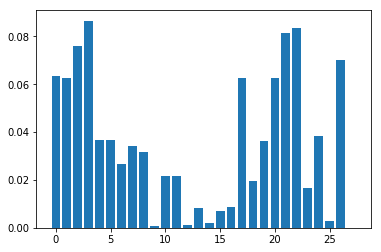

In [102]:
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [92]:
train.head()

,AGREEMENTID,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,...,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT
0,11220001,1.171011e+07,1.171011e+07,13.734072,10.612692,58.0,120,1,7994.273589,7994.273589,...,9.447930e+06,2.617476e+06,9.338009e+06,83559.0,40.06,39,19.0,0.0,0.60,118.0
1,11220002,1.929025e+07,1.929025e+07,13.734072,10.612692,137.0,180,1,100504.575864,100504.575864,...,6.942656e+06,4.945154e+06,1.713861e+07,126530.0,84.31,38,99.0,0.0,0.60,118.0
2,11220006,3.933395e+06,3.933395e+06,16.231176,11.549106,359.0,180,5,5947.630536,5947.630536,...,1.030583e+05,1.360684e+06,3.830337e+06,28518.0,50.89,36,323.0,0.0,0.72,118.0
3,11220008,1.002259e+07,1.002259e+07,13.734072,10.612692,194.0,180,1,60322.180776,60322.180776,...,1.811075e+06,2.984047e+06,9.412549e+06,65741.0,84.63,37,157.0,0.0,0.60,118.0
4,11220010,7.755937e+06,7.755937e+06,15.606900,10.924830,341.0,180,5,27732.787464,27732.787464,...,2.442289e+05,2.573672e+06,7.511708e+06,54433.0,30.94,36,305.0,0.0,0.83,118.0


In [93]:
train.drop(["AGREEMENTID"],axis = 1, inplace = True)

In [94]:
test.drop(["AGREEMENTID"],axis = 1, inplace = True)

In [ ]:
aaaaaa

,AGREEMENTID,FORECLOSURE,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,...,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,11220001,1.0,1.2001e+07,11710107.24,11710107.24,2010-08-30,13.734072,10.612692,58.0,120,...,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
1,11220001,1.0,1.2001e+07,11710107.24,11710107.24,2010-08-30,13.734072,10.612692,58.0,120,...,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
2,11220001,1.0,1.2001e+07,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,...,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
3,11220001,1.0,1.2001e+07,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,...,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
4,11220001,1.0,1.2001e+07,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,...,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0


In [111]:
result.head()

,AGREEMENTID,FORECLOSURE,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,1.0,12001000.0,11710107.24,11710107.24,2010-08-30,13.734072,10.612692,58.0,120,...,40.06,39,19.0,0.0,0.6,HL,10901100.0,NaN,NaN,39
1,11220001,1.0,12001000.0,11710107.24,11710107.24,2010-08-30,13.734072,10.612692,58.0,120,...,40.06,40,18.0,0.0,0.6,HL,10901100.0,NaN,NaN,40
2,11220001,1.0,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,...,40.06,41,17.0,0.0,0.6,HL,10901100.0,NaN,NaN,41
3,11220001,1.0,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,...,40.06,41,17.0,0.0,0.6,HL,10901100.0,NaN,NaN,42
4,11220001,1.0,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,...,40.06,43,15.0,0.0,0.6,HL,10901100.0,NaN,NaN,43


In [117]:
result_data.shape

(624250, 53)

In [113]:
39+15

54

In [118]:
#displays number of NA values in whole data set as summary
result_data.isnull().sum()

AGREEMENTID                   0
FORECLOSURE              249665
CUSTOMERID                  516
LOAN_AMT                      0
NET_DISBURSED_AMT             0
INTEREST_START_DATE           0
CURRENT_ROI                   0
ORIGNAL_ROI                   0
CURRENT_TENOR                 5
ORIGNAL_TENOR                 0
DUEDAY                        0
AUTHORIZATIONDATE             0
CITY                          8
PRE_EMI_DUEAMT                0
PRE_EMI_RECEIVED_AMT          0
PRE_EMI_OS_AMOUNT             0
EMI_DUEAMT                    0
EMI_RECEIVED_AMT              0
EMI_OS_AMOUNT                 0
EXCESS_AVAILABLE              0
EXCESS_ADJUSTED_AMT           0
BALANCE_EXCESS                0
NET_RECEIVABLE                0
OUTSTANDING_PRINCIPAL         0
PAID_PRINCIPAL                0
PAID_INTEREST                 0
MONTHOPENING                  0
LAST_RECEIPT_DATE          3787
LAST_RECEIPT_AMOUNT       12045
NET_LTV                       0
COMPLETED_TENURE              0
BALANCE_

In [84]:
train_data['education']=train_data.education.map({"Master's & above":0,"Bachelor's":1,'Below Secondary':2}).astype('category')
train_data['gender'] = train_data.gender.map({"m":0,"f":1}).astype('category')
test_data['education']=test_data.education.map({"Master's & above":0,"Bachelor's":1,'Below Secondary':2}).astype('category')
test_data['gender'] = test_data.gender.map({"m":0,"f":1}).astype('category')

In [85]:
train_data = train_data.fillna(train_data['education'].value_counts().index[0])
test_data = test_data.fillna(test_data['education'].value_counts().index[0])


In [48]:
#displays number of NA values in whole data set as summary
test_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_data["recruitment_channel"] = labelencoder.fit_transform(train_data["recruitment_channel"])
test_data["recruitment_channel"] = labelencoder.fit_transform(test_data["recruitment_channel"])


In [50]:
train_data.dtypes

employee_id                int64
department                object
region                    object
education               category
gender                  category
recruitment_channel        int64
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met >80%              int64
awards_won?                int64
avg_training_score         int64
is_promoted                int64
dtype: object

In [87]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [88]:
train_data = train_data.join(pd.DataFrame(lb.fit_transform(train_data["department"]),
                          columns=lb.classes_, 
                          index=train_data.index))

In [89]:
test_data = test_data.join(pd.DataFrame(lb.fit_transform(test_data["department"]),
                          columns=lb.classes_, 
                          index=test_data.index))

In [90]:
train_data.drop(['department',"region"], axis=1, inplace=True)

In [91]:
test_data.drop(['department',"region"], axis=1, inplace=True)

In [92]:
Y = train_data["is_promoted"]

In [93]:
train_data.drop(['is_promoted'], axis=1, inplace=True)

In [96]:
train_data.shape

(54808, 23)

In [97]:
test_data.shape

(23490, 23)

In [74]:
train_data.head()

,employee_id,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,65438,0.0,1,2,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0
1,65141,1.0,0,0,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0
2,7513,1.0,0,2,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0
3,2542,1.0,0,0,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0
4,48945,1.0,0,0,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1


In [94]:
train_data["total"]=train_data["KPIs_met >80%"]+train_data["awards_won?"]+train_data["previous_year_rating"]
train_data["total_training"]=train_data["no_of_trainings"]+train_data["avg_training_score"]
test_data["total"]=test_data["KPIs_met >80%"]+test_data["awards_won?"]+test_data["previous_year_rating"]
test_data["total_training"]=test_data["no_of_trainings"]+test_data["avg_training_score"]


In [95]:
train_data["Joining_age"]=train_data["age"]-train_data["length_of_service"]
test_data["Joining_age"]=test_data["age"]-train_data["length_of_service"]


In [98]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(train_data, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
predictions = model.predict(test_data)
final_result = pd.DataFrame({'employee_id':test_data['employee_id'],'is_promoted':predictions})
final_result.to_csv('lgPredmodel1.csv',index=False)

In [87]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
# train the model using X_train_dtm (timing it with an IPython "magic command")
model.fit(train_data, Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)